# 📊 Data Exploration - Retail Customer Analytics

This notebook provides comprehensive exploratory data analysis (EDA) of the retail customer dataset.

## Objectives:
- Load and examine the raw customer data
- Understand data structure, types, and quality
- Identify patterns, trends, and anomalies
- Generate initial insights for business stakeholders
- Prepare data quality assessment for preprocessing


In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

# Configure plotting
plt.style.use('default')
sns.set_palette('husl')
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

print("📚 Libraries imported successfully!")

📚 Libraries imported successfully!


## 1. Data Loading and Initial Inspection

In [ ]:
# Load the dataset
# Option 1: Load from Kaggle dataset
# df = pd.read_csv('https://www.kaggle.com/datasets/iamsouravbanerjee/customer-shopping-trends-dataset')

# Option 2: Load from local file
try:
    df = pd.read_csv('../data/raw/customer_shopping_data.csv')
    print(f"✅ Dataset loaded successfully!")
    print(f"📏 Dataset shape: {df.shape}")
except FileNotFoundError:
    print("⚠️ Dataset file not found. Using sample data generator...")
    # Use our sample data generator
    import sys
    sys.path.append('../src')
    from src.utils.common import load_sample_data
    df = load_sample_data(n_customers=2000)
    print(f"✅ Sample dataset generated successfully!")
    print(f"📏 Dataset shape: {df.shape}")

✅ Dataset loaded successfully!
📏 Dataset shape: (3900, 19)


In [3]:
# Basic dataset information
print("📋 DATASET OVERVIEW")
print("=" * 50)
print(f"Number of records: {len(df):,}")
print(f"Number of features: {df.shape[1]}")
print(f"Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
print("\n📊 COLUMN INFORMATION:")
df.info()

📋 DATASET OVERVIEW
Number of records: 3,900
Number of features: 19
Memory usage: 3.43 MB

📊 COLUMN INFORMATION:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               3900 non-null   int64  
 1   Age                       3900 non-null   int64  
 2   Gender                    3900 non-null   object 
 3   Item Purchased            3900 non-null   object 
 4   Category                  3900 non-null   object 
 5   Purchase Amount (USD)     3900 non-null   int64  
 6   Location                  3900 non-null   object 
 7   Size                      3900 non-null   object 
 8   Color                     3900 non-null   object 
 9   Season                    3900 non-null   object 
 10  Review Rating             3900 non-null   float64
 11  Subscription Status       3900 non-null   object 
 12  Paymen

In [4]:
# Display first few rows
print("🔍 FIRST 5 ROWS:")
display(df.head())

print("\n🔍 LAST 5 ROWS:")
display(df.tail())

🔍 FIRST 5 ROWS:


,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually



🔍 LAST 5 ROWS:


,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,Cash,2-Day Shipping,No,No,32,Venmo,Weekly
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,PayPal,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Credit Card,Standard,No,No,24,Venmo,Quarterly
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,PayPal,Express,No,No,24,Venmo,Weekly
3899,3900,52,Female,Handbag,Accessories,81,California,M,Beige,Spring,3.1,No,Bank Transfer,Store Pickup,No,No,33,Venmo,Quarterly


In [5]:
# Statistical summary
print("📈 STATISTICAL SUMMARY - NUMERICAL FEATURES:")
display(df.describe())

print("\n📝 STATISTICAL SUMMARY - CATEGORICAL FEATURES:")
display(df.describe(include=['object']))

📈 STATISTICAL SUMMARY - NUMERICAL FEATURES:


,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000



📝 STATISTICAL SUMMARY - CATEGORICAL FEATURES:


,Gender,Item Purchased,Category,Location,Size,Color,Season,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Preferred Payment Method,Frequency of Purchases
count,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900
unique,2,25,4,50,4,25,4,2,6,6,2,2,6,7
top,Male,Blouse,Clothing,Montana,M,Olive,Spring,No,Credit Card,Free Shipping,No,No,PayPal,Every 3 Months
freq,2652,171,1737,96,1755,177,999,2847,696,675,2223,2223,677,584


## 2. Data Quality Assessment

In [6]:
# Check for missing values
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

missing_df = pd.DataFrame({
    'Column': missing_values.index,
    'Missing Count': missing_values.values,
    'Missing Percentage': missing_percentage.values
}).sort_values('Missing Count', ascending=False)

print("❓ MISSING VALUES ANALYSIS:")
display(missing_df[missing_df['Missing Count'] > 0])

if missing_df['Missing Count'].sum() == 0:
    print("✅ No missing values found in the dataset!")

❓ MISSING VALUES ANALYSIS:


,Column,Missing Count,Missing Percentage


✅ No missing values found in the dataset!


In [7]:
# Check for duplicates
duplicates = df.duplicated().sum()
print(f"🔄 DUPLICATE RECORDS: {duplicates}")

if duplicates > 0:
    print(f"⚠️ Found {duplicates} duplicate records ({duplicates/len(df)*100:.2f}% of data)")
    # Show duplicate examples
    print("\nExamples of duplicate records:")
    display(df[df.duplicated(keep=False)].head())
else:
    print("✅ No duplicate records found!")

🔄 DUPLICATE RECORDS: 0
✅ No duplicate records found!


In [8]:
# Data type analysis
dtype_summary = df.dtypes.value_counts()
print("🏷️ DATA TYPES SUMMARY:")
for dtype, count in dtype_summary.items():
    print(f"  {dtype}: {count} columns")

# Identify potential data type issues
print("\n🔍 POTENTIAL DATA TYPE ISSUES:")
for col in df.columns:
    if df[col].dtype == 'object':
        # Check if numeric data is stored as object
        try:
            pd.to_numeric(df[col])
            print(f"  ⚠️ {col}: Stored as object but appears to be numeric")
        except:
            pass
    
    # Check for date columns
    if 'date' in col.lower() and df[col].dtype == 'object':
        print(f"  📅 {col}: Appears to be a date column but stored as object")

🏷️ DATA TYPES SUMMARY:
  object: 14 columns
  int64: 4 columns
  float64: 1 columns

🔍 POTENTIAL DATA TYPE ISSUES:


## 3. Univariate Analysis

📊 ANALYZING 5 NUMERICAL FEATURES:
['Customer ID', 'Age', 'Purchase Amount (USD)', 'Review Rating', 'Previous Purchases']


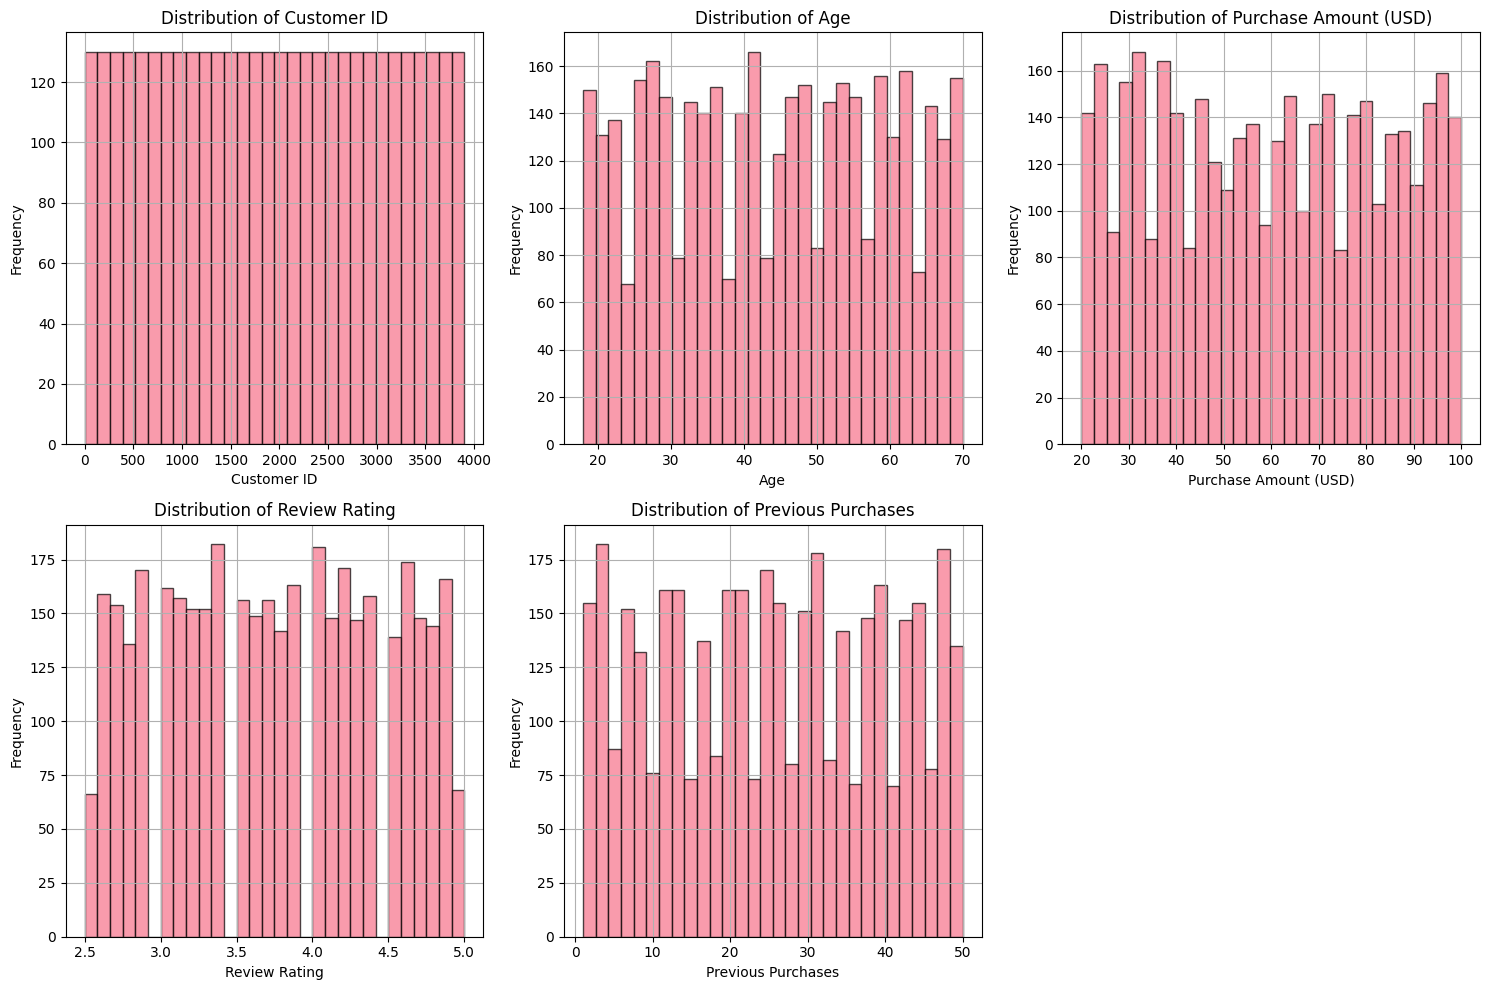

In [9]:
# Numerical features distribution
numerical_cols = df.select_dtypes(include=[np.number]).columns
print(f"📊 ANALYZING {len(numerical_cols)} NUMERICAL FEATURES:")
print(list(numerical_cols))

# Create distribution plots
if len(numerical_cols) > 0:
    n_cols = min(3, len(numerical_cols))
    n_rows = (len(numerical_cols) + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
    axes = axes.flatten() if len(numerical_cols) > 1 else [axes]
    
    for i, col in enumerate(numerical_cols):
        if i < len(axes):
            df[col].hist(bins=30, ax=axes[i], alpha=0.7, edgecolor='black')
            axes[i].set_title(f'Distribution of {col}')
            axes[i].set_xlabel(col)
            axes[i].set_ylabel('Frequency')
    
    # Hide empty subplots
    for i in range(len(numerical_cols), len(axes)):
        axes[i].set_visible(False)
    
    plt.tight_layout()
    plt.show()

In [10]:
# Categorical features analysis
categorical_cols = df.select_dtypes(include=['object']).columns
print(f"📝 ANALYZING {len(categorical_cols)} CATEGORICAL FEATURES:")
print(list(categorical_cols))

for col in categorical_cols:
    print(f"\n🏷️ {col}:")
    value_counts = df[col].value_counts()
    print(f"  Unique values: {df[col].nunique()}")
    print(f"  Most frequent: {value_counts.index[0]} ({value_counts.iloc[0]} occurrences)")
    
    if df[col].nunique() <= 10:  # Show all values if <= 10 unique
        print("  Value distribution:")
        for val, count in value_counts.items():
            percentage = (count / len(df)) * 100
            print(f"    {val}: {count} ({percentage:.1f}%)")
    else:
        print(f"  Top 5 values: {list(value_counts.head().index)}")

📝 ANALYZING 14 CATEGORICAL FEATURES:
['Gender', 'Item Purchased', 'Category', 'Location', 'Size', 'Color', 'Season', 'Subscription Status', 'Payment Method', 'Shipping Type', 'Discount Applied', 'Promo Code Used', 'Preferred Payment Method', 'Frequency of Purchases']

🏷️ Gender:
  Unique values: 2
  Most frequent: Male (2652 occurrences)
  Value distribution:
    Male: 2652 (68.0%)
    Female: 1248 (32.0%)

🏷️ Item Purchased:
  Unique values: 25
  Most frequent: Blouse (171 occurrences)
  Top 5 values: ['Blouse', 'Pants', 'Jewelry', 'Shirt', 'Dress']

🏷️ Category:
  Unique values: 4
  Most frequent: Clothing (1737 occurrences)
  Value distribution:
    Clothing: 1737 (44.5%)
    Accessories: 1240 (31.8%)
    Footwear: 599 (15.4%)
    Outerwear: 324 (8.3%)

🏷️ Location:
  Unique values: 50
  Most frequent: Montana (96 occurrences)
  Top 5 values: ['Montana', 'California', 'Idaho', 'Illinois', 'Alabama']

🏷️ Size:
  Unique values: 4
  Most frequent: M (1755 occurrences)
  Value distribut

In [11]:
# Interactive categorical distribution plots
if len(categorical_cols) > 0:
    for col in categorical_cols[:4]:  # Limit to first 4 categorical columns
        if df[col].nunique() <= 20:  # Only plot if reasonable number of categories
            fig = px.bar(
                x=df[col].value_counts().index,
                y=df[col].value_counts().values,
                title=f'Distribution of {col}',
                labels={'x': col, 'y': 'Count'}
            )
            fig.update_layout(height=400)
            fig.show()
        else:
            print(f"⚠️ Skipping {col} - too many categories ({df[col].nunique()})")

⚠️ Skipping Item Purchased - too many categories (25)


⚠️ Skipping Location - too many categories (50)


## 4. Key Business Insights

In [12]:
# Generate key business insights
print("💡 KEY BUSINESS INSIGHTS")
print("=" * 50)

insights = []

# Find key columns
customer_col = 'Customer ID' if 'Customer ID' in df.columns else None
amount_col = next((col for col in df.columns if 'amount' in col.lower() or 'price' in col.lower()), None)
category_col = next((col for col in df.columns if 'category' in col.lower()), None)
age_col = next((col for col in df.columns if 'age' in col.lower()), None)

# Customer insights
if customer_col:
    unique_customers = df[customer_col].nunique()
    total_transactions = len(df)
    avg_transactions_per_customer = total_transactions / unique_customers
    
    insights.append(f"👥 Customer Base: {unique_customers:,} unique customers")
    insights.append(f"🛒 Average transactions per customer: {avg_transactions_per_customer:.1f}")

# Revenue insights
if amount_col:
    total_revenue = df[amount_col].sum()
    avg_transaction_value = df[amount_col].mean()
    median_transaction_value = df[amount_col].median()
    
    insights.append(f"💰 Total revenue: ${total_revenue:,.2f}")
    insights.append(f"💳 Average transaction value: ${avg_transaction_value:.2f}")
    insights.append(f"💳 Median transaction value: ${median_transaction_value:.2f}")

# Category insights
if category_col:
    top_category = df[category_col].value_counts().index[0]
    top_category_count = df[category_col].value_counts().iloc[0]
    category_percentage = (top_category_count / len(df)) * 100
    
    insights.append(f"🏆 Most popular category: {top_category} ({category_percentage:.1f}% of transactions)")
    insights.append(f"📝 Total categories: {df[category_col].nunique()}")

# Age insights (if available)
if age_col:
    avg_age = df[age_col].mean()
    median_age = df[age_col].median()
    age_range = df[age_col].max() - df[age_col].min()
    
    insights.append(f"👶 Customer age - Average: {avg_age:.1f}, Median: {median_age:.1f}, Range: {age_range}")

# Data quality insights
completeness = (1 - df.isnull().sum().sum() / (len(df) * len(df.columns))) * 100
insights.append(f"✅ Data completeness: {completeness:.1f}%")

# Print insights
for i, insight in enumerate(insights, 1):
    print(f"{i:2d}. {insight}")

print("\n" + "=" * 50)
print("📋 RECOMMENDATIONS FOR NEXT STEPS:")
print("1. 🧹 Data Preprocessing: Address missing values and duplicates")
print("2. 🔧 Feature Engineering: Create RFM features, customer segments")
print("3. 📊 Advanced Analytics: Customer segmentation, churn prediction")
print("4. 🤖 Machine Learning: Recommendation systems, CLV prediction")
print("5. 📈 Business Intelligence: Dashboard creation, KPI monitoring")

💡 KEY BUSINESS INSIGHTS
 1. 👥 Customer Base: 3,900 unique customers
 2. 🛒 Average transactions per customer: 1.0
 3. 💰 Total revenue: $233,081.00
 4. 💳 Average transaction value: $59.76
 5. 💳 Median transaction value: $60.00
 6. 🏆 Most popular category: Clothing (44.5% of transactions)
 7. 📝 Total categories: 4
 8. 👶 Customer age - Average: 44.1, Median: 44.0, Range: 52
 9. ✅ Data completeness: 100.0%

📋 RECOMMENDATIONS FOR NEXT STEPS:
1. 🧹 Data Preprocessing: Address missing values and duplicates
2. 🔧 Feature Engineering: Create RFM features, customer segments
3. 📊 Advanced Analytics: Customer segmentation, churn prediction
4. 🤖 Machine Learning: Recommendation systems, CLV prediction
5. 📈 Business Intelligence: Dashboard creation, KPI monitoring


In [13]:
# Save exploration results
try:
    # Create summary statistics file
    summary_stats = df.describe(include='all')
    summary_stats.to_csv('../reports/analysis/01_exploration_summary.csv')
    
    # Save data quality report
    quality_report = pd.DataFrame({
        'Column': df.columns,
        'Data_Type': df.dtypes,
        'Missing_Count': df.isnull().sum(),
        'Missing_Percentage': (df.isnull().sum() / len(df)) * 100,
        'Unique_Values': [df[col].nunique() for col in df.columns]
    })
    quality_report.to_csv('../reports/analysis/01_data_quality_report.csv', index=False)
    
    print("💾 Reports saved to ../reports/analysis/")
    print("   - 01_exploration_summary.csv")
    print("   - 01_data_quality_report.csv")
except Exception as e:
    print(f"⚠️ Could not save reports: {e}")

print("\n✅ DATA EXPLORATION COMPLETED!")
print("\n🚀 Ready for next notebook: 02_eda_insights.ipynb")

💾 Reports saved to ../reports/analysis/
   - 01_exploration_summary.csv
   - 01_data_quality_report.csv

✅ DATA EXPLORATION COMPLETED!

🚀 Ready for next notebook: 02_eda_insights.ipynb
